In [22]:
# -*- coding: utf-8 -*-
r"""
laplace.py program
Laplace equation solving program 
Solve Laplace equation by iterative method
Usage c: \> python laplace.py
"""
# Import module
import math

# Constant
LIMIT = 1000 # number of iterations
N = 101 # Number of divisions in the x-axis direction
M = 101 # Number of divisions in the y-axis direction

# Define subcontract function
# iteration () function

def is_in_D2(i, j):
    return i + j <= N - 1

def iteration(u):
    "" "One iteration" ""
    u_next = [[0 for i in range (N)] for j in range (M)] # next step uij
    # Calculate next step value
    for i in range(1, N - 1):
        for j in range(1, M - 1):
            if is_in_D2(i, j):
                u_next[i][j] = (u[i][j - 1] + u[i -1][j] + u[i + 1][j] + u[i][j + 1]) / 4
            else:
                u_next[i][j] = 0

    # update uij
    for i in range(1, N - 1):
        for j in range(1, M - 1):
            u[i][j] = u_next[i][j]
# end of iteration () function

# Main execution part
u = [[0 for i in range (N)] for j in range (M)] # uij initialization

for i in range(M):
    u[0][i] = math.sin(2 * math.pi * i / (M - 1))

for j in range(N):
    u[j][0] = math.cos(2 * math.pi * j / (N - 1))
    u[j][N-1-j] = 0
    

# Iterative calculation
for i in range(LIMIT):
    iteration(u)

import numpy as np
for i in range(M):
    for j in range(N):
        if not is_in_D2(i, j):
            u[j][i] = np.nan


# print (u) # print result
# end of laplace.py

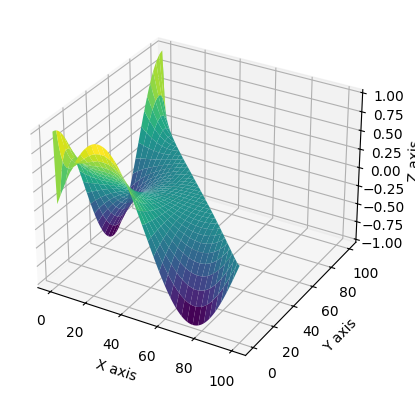

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

u_array = np.array(u)

X, Y = np.meshgrid(range(N), range(M))
Z = u_array

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

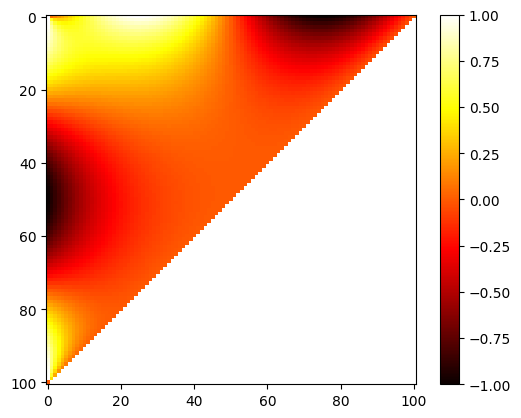

In [24]:
import matplotlib.pyplot as plt
import numpy as np

u_array = np.array(u)
plt.imshow(u_array, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()